# This is an Jupyter-Notebook-Example

## Jupyter is a browser-based Python-Environment

## The Boston Housing Dataset is a standard example for Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston   # load toy data_set

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPRegressor  # Neural Net
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
 
from sklearn.metrics import mean_absolute_error as mae  

In [2]:
dataset = load_boston()
df      = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [3]:
print(dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Multivariate Regression

X = dataset.data
y = dataset.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


### Split Data-Set into Train- and Test-Data: 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 5, shuffle = True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 13)
(455,)
(51, 13)
(51,)


In [6]:
X_train

array([[2.41030e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 1.27900e+01],
       [9.51200e-02, 0.00000e+00, 1.28300e+01, ..., 1.87000e+01,
        3.83230e+02, 8.94000e+00],
       [1.61282e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        2.48310e+02, 2.03400e+01],
       ...,
       [1.78990e-01, 0.00000e+00, 9.69000e+00, ..., 1.92000e+01,
        3.93290e+02, 1.76000e+01],
       [2.29690e-01, 0.00000e+00, 1.05900e+01, ..., 1.86000e+01,
        3.94870e+02, 1.09700e+01],
       [1.06590e-01, 8.00000e+01, 1.91000e+00, ..., 2.20000e+01,
        3.76040e+02, 5.57000e+00]])

### Try with and without Feature Scaling !

In [7]:
## Feature-Scaleing ?
#
scaler  = StandardScaler() 
X_train = scaler.fit_transform(X_train)  
X_test  = scaler.transform(X_test)       # no fit on test-data

## Linear Regression

train error:  3.3052767804899035
test error:   3.3796090672800525


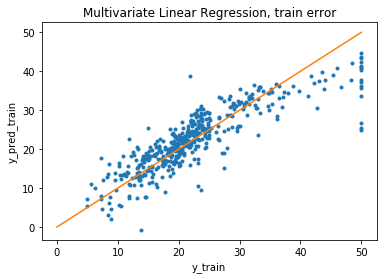

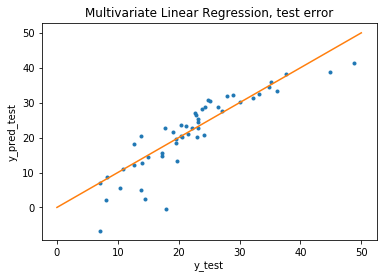

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

err_train_LR = mae(y_train, y_pred_train)  # train_error
err_test_LR  = mae(y_test, y_pred_test)    # test_error

print("train error: ", err_train_LR)
print("test error:  ", err_test_LR)

plt.figure()
plt.plot(y_train, y_pred_train, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_train")
plt.ylabel("y_pred_train")
plt.title("Multivariate Linear Regression, train error")
plt.show()

plt.figure()
plt.plot(y_test, y_pred_test, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.title("Multivariate Linear Regression, test error")
plt.show()

## Random Forest Regression 

train error:  0.8052795604395612
test error:   2.4363725490196178


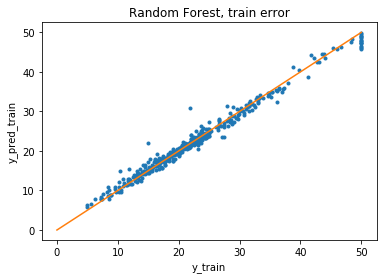

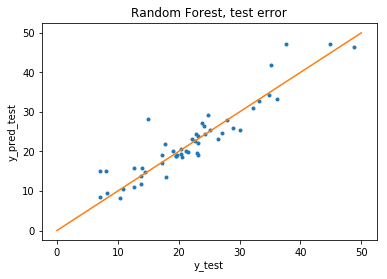

In [9]:
model = RandomForestRegressor(n_estimators = 500)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

err_train_RF = mae(y_train, y_pred_train)  # train_error
err_test_RF  = mae(y_test, y_pred_test)    # test_error

print("train error: ", err_train_RF)
print("test error:  ", err_test_RF)

plt.figure()
plt.plot(y_train, y_pred_train, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_train")
plt.ylabel("y_pred_train")
plt.title("Random Forest, train error")
plt.show()

plt.figure()
plt.plot(y_test, y_pred_test, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.title("Random Forest, test error")
plt.show()

## Support Vector Machine

train error:  0.8897695710914701
test error:   1.811463960533181


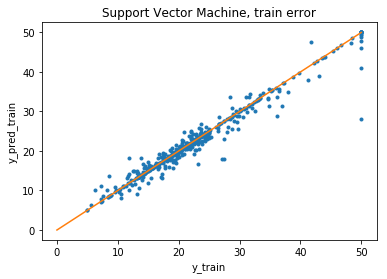

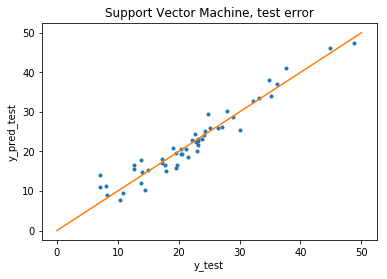

In [10]:
model = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.01)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

err_train_SVM = mae(y_train, y_pred_train)  # train_error
err_test_SVM  = mae(y_test, y_pred_test)    # test_error

print("train error: ", err_train_SVM)
print("test error:  ", err_test_SVM)

plt.figure()
plt.plot(y_train, y_pred_train, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_train")
plt.ylabel("y_pred_train")
plt.title("Support Vector Machine, train error")
plt.show()

plt.figure()
plt.plot(y_test, y_pred_test, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.title("Support Vector Machine, test error")
plt.show()

## Artificial Neural Net (ANN)

train error:  1.6474188797753593
test error:   1.9674733754513394


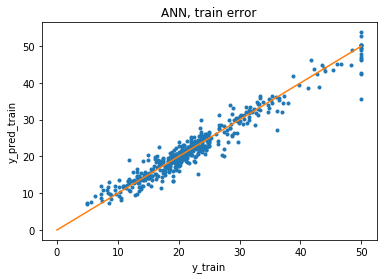

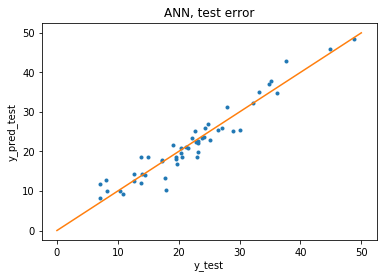

In [11]:
nds = 16   # nodes
hls =  (nds,nds,nds,nds,nds) # ,nds,nds,nds,nds,nds)   # hidden layers

model = MLPRegressor(hidden_layer_sizes = hls, learning_rate = 'adaptive', learning_rate_init = 0.01, 
                     shuffle = False, random_state = 3)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

err_train_ANN = mae(y_train, y_pred_train)  # train_error
err_test_ANN  = mae(y_test, y_pred_test)    # test_error

print("train error: ", err_train_ANN)
print("test error:  ", err_test_ANN)

plt.figure()
plt.plot(y_train, y_pred_train, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_train")
plt.ylabel("y_pred_train")
plt.title("ANN, train error")
plt.show()

plt.figure()
plt.plot(y_test, y_pred_test, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.title("ANN, test error")
plt.show()

### Which model works best for the house price example?

# Again with Cross-Validation  
### shuffle = True/False ?! 

In [12]:
#kf = KFold(n_splits = 5, shuffle = False)  # try shuffle = False and shuffle = True !!
kf = KFold(n_splits = 5, shuffle = True)

In [13]:
X = dataset.data
y = dataset.target

### For Cross-Validation the scaling is not so easy (as for Train_Test_Split) to do correctly !!

In [14]:
# model = make_pipeline( StandardScaler(), RegressionClassifier() )

## Linear Regression

pred. error:   3.4309550320947277


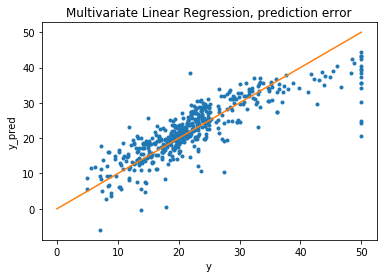

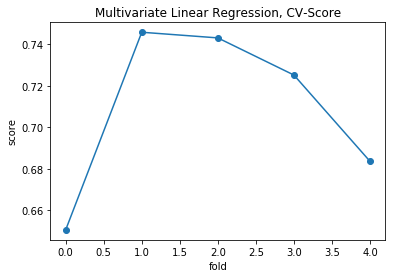

In [15]:
#model = LinearRegression()

model = make_pipeline( StandardScaler(), LinearRegression() )

y_score = cross_val_score(   model, X, y, cv = kf, n_jobs = -1 )
y_pred  = cross_val_predict( model, X, y, cv = kf, n_jobs = -1 )

err_pred_LR  = mae(y, y_pred)

print("pred. error:  ", err_pred_LR)

plt.figure()
plt.plot(y, y_pred, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y")
plt.ylabel("y_pred")
plt.title("Multivariate Linear Regression, prediction error")
plt.show()

plt.figure()
plt.plot(y_score, 'o-')
plt.xlabel("fold")
plt.ylabel("score")
plt.title("Multivariate Linear Regression, CV-Score")
plt.show()


## Random Forest

pred. error:   2.219676284584983


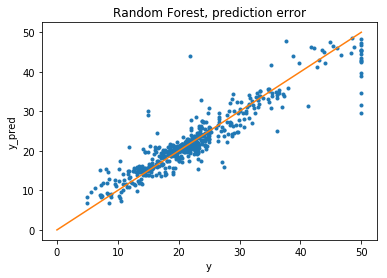

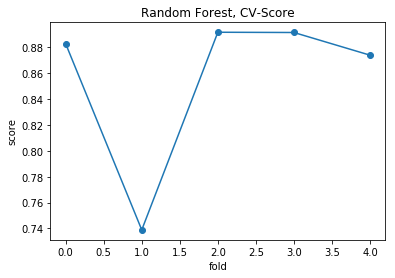

In [16]:
#model = RandomForestRegressor(n_estimators = 500)

model = make_pipeline( StandardScaler(), RandomForestRegressor(n_estimators = 500) )

y_score = cross_val_score(   model, X, y, cv = kf, n_jobs = -1 )
y_pred  = cross_val_predict( model, X, y, cv = kf, n_jobs = -1 )

err_pred_RF  = mae(y, y_pred)

print("pred. error:  ", err_pred_RF)

plt.figure()
plt.plot(y, y_pred, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y")
plt.ylabel("y_pred")
plt.title("Random Forest, prediction error")
plt.show()

plt.figure()
plt.plot(y_score, 'o-')
plt.xlabel("fold")
plt.ylabel("score")
plt.title("Random Forest, CV-Score")
plt.show()

## Support Vector Machine

pred. error:   2.1657384097542365


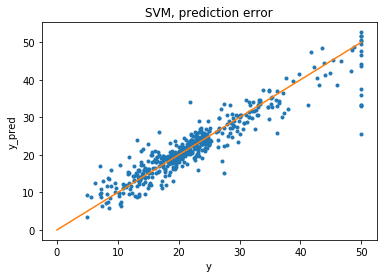

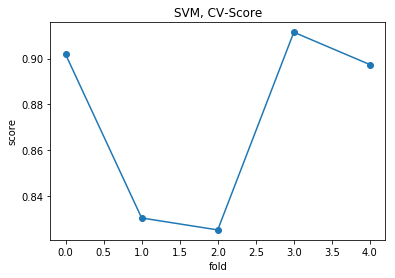

In [17]:
#model = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.01)

model = make_pipeline( StandardScaler(), SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.01) )

y_score = cross_val_score(   model, X, y, cv = kf, n_jobs = -1 )
y_pred  = cross_val_predict( model, X, y, cv = kf, n_jobs = -1 )

err_pred_SVM  = mae(y, y_pred)

print("pred. error:  ", err_pred_SVM)

plt.figure()
plt.plot(y, y_pred, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y")
plt.ylabel("y_pred")
plt.title("SVM, prediction error")
plt.show()

plt.figure()
plt.plot(y_score, 'o-')
plt.xlabel("fold")
plt.ylabel("score")
plt.title("SVM, CV-Score")
plt.show()

## Artificial Neural Net

pred. error:   3.294647644057122


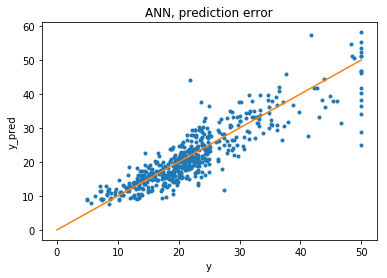

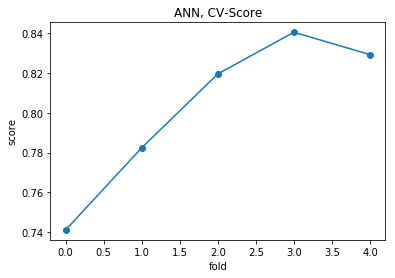

In [18]:
nds = 16   # nodes
hls =  (nds,nds,nds,nds,nds) # ,nds,nds,nds,nds,nds)   # hidden layers

#model = MLPRegressor(hidden_layer_sizes = hls, learning_rate = 'adaptive', learning_rate_init = 0.01, 
#                     shuffle = False, random_state = 3)

model = make_pipeline(StandardScaler(), 
                      MLPRegressor(hidden_layer_sizes = hls, learning_rate = 'adaptive', 
                                   learning_rate_init = 0.01, shuffle = False, random_state = 3) )

y_score = cross_val_score(   model, X, y, cv = kf, n_jobs = -1 )
y_pred  = cross_val_predict( model, X, y, cv = kf, n_jobs = -1 )

err_pred_ANN  = mae(y, y_pred)

print("pred. error:  ", err_pred_ANN)

plt.figure()
plt.plot(y, y_pred, '.')
plt.plot([0,50],[0,50], '-')
plt.xlabel("y")
plt.ylabel("y_pred")
plt.title("ANN, prediction error")
plt.show()

plt.figure()
plt.plot(y_score, 'o-')
plt.xlabel("fold")
plt.ylabel("score")
plt.title("ANN, CV-Score")
plt.show()

### What do you observe? 

### Is the error for the Test-Set strategy or for Cross Validation higher? 

### What is better?

In [19]:
print("LR train error:  ", err_train_LR)
print("LR test error:   ", err_test_LR)
print("LR cv-error:     ", err_pred_LR)
print(" ")
print("RF train error:  ", err_train_RF)
print("RF test error:   ", err_test_RF)
print("RF cv-error:     ", err_pred_RF)
print(" ")
print("SVM train error:  ", err_train_SVM)
print("SVM test error:   ", err_test_SVM)
print("SVM cv-error:     ", err_pred_SVM)
print(" ")
print("ANN train error:  ", err_train_ANN)
print("ANN test error:   ", err_test_ANN)
print("ANN cv-error:     ", err_pred_ANN)


LR train error:   3.3052767804899035
LR test error:    3.3796090672800525
LR cv-error:      3.4309550320947277
 
RF train error:   0.8052795604395612
RF test error:    2.4363725490196178
RF cv-error:      2.219676284584983
 
SVM train error:   0.8897695710914701
SVM test error:    1.811463960533181
SVM cv-error:      2.1657384097542365
 
ANN train error:   1.6474188797753593
ANN test error:    1.9674733754513394
ANN cv-error:      3.294647644057122
